In [2]:
import pandas as pd

# Load the iris dataset
iris_data = pd.read_csv('iris-data-new2.csv')

iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type,package,price
0,5.1,3.5,1.4,0.2,Iris-setosa,2,Medium
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Low
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Low
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Low
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Low


In [3]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,package
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,0.442953
std,0.799542,0.430104,1.758720,0.762191,0.710753
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# fit a descision tree classifier with sepal_length_cm, sepal_width_cm, petal_length_cm and petal_width_cm

features = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
target = 'price'

X = iris_data[features].values
y = iris_data[target].values

y[:5]

array(['Medium', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets (75% training and 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, clf.predict(X_test), average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)


Accuracy:  0.6578947368421053
Precision:  0.5551900584795322
Recall:  0.5527777777777777
F1:  0.5382911661981429


['Medium' 'Medium' 'Low' 'Low' 'Low']


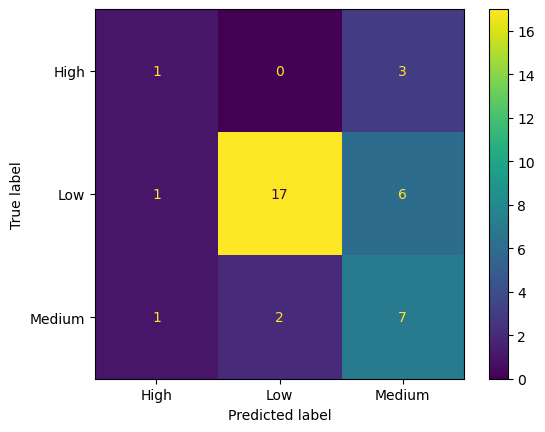

In [7]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

y_pred = clf.predict(X_test)
print(y_pred[:5])

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_)

In [8]:
# now let's fit a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, knn.predict(X_test), average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Accuracy:  0.6842105263157895
Precision:  0.6095238095238095
Recall:  0.6166666666666667
F1:  0.6060606060606061


['Medium' 'Medium' 'Low' 'Low' 'Low']


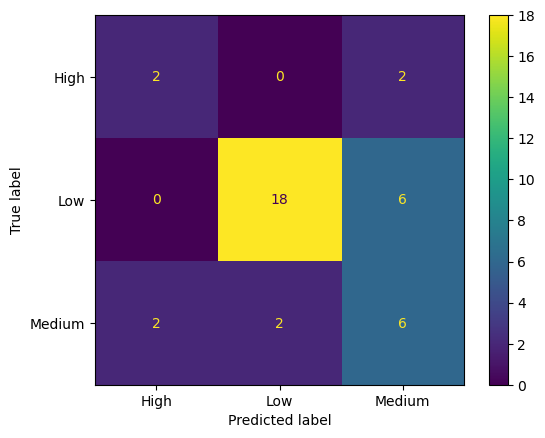

In [9]:
# create a confusion matrix
y_pred = knn.predict(X_test)
print(y_pred[:5])

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=knn.classes_)

In [18]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

# define the parameter values that should be searched
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)

# fit the grid with data
grid.fit(X, y)

# examine the best model
print('Best score: ', grid.best_score_)
print('Best parameters: ', grid.best_params_)


Best score:  0.8171428571428571
Best parameters:  {'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'min_samples_split': 9, 'splitter': 'random'}


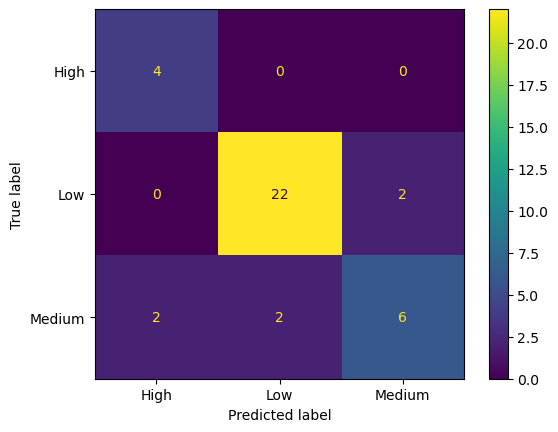

In [19]:
# create a confusion matrix
y_pred = grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=grid.classes_)